In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the dataset
df = pd.read_csv('weather.csv')

In [2]:
# Getting datatypes of columns in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [3]:
df.shape

(366, 22)

In [4]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [5]:

# Deleting the rows with the dropna() function
df.dropna(axis = 0, inplace = True)

In [6]:
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [7]:
df.shape

(328, 22)

In [8]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [10]:
# Mapping the 'Rain Today' column and verifying the distribution of values
# Printing the distribution before mapping
print(df['RainToday'].value_counts())
# Mapping the values of the column to convert the categorical values to integer
map1_dict = {'No': 0,
             'Yes': 1}

df['RainToday'] = df['RainToday'].map(map1_dict)
# Printing the distribution after mapping
print(df['RainToday'].value_counts())

No     267
Yes     61
Name: RainToday, dtype: int64
0    267
1     61
Name: RainToday, dtype: int64


In [11]:
# Mapping the 'Rain Tomorrow' column and verifying the distribution of values
# Printing the distribution before mapping
print(df['RainTomorrow'].value_counts())
# Mapping the values of the column to convert the categorical values to integer
map1_dict = {'No': 0,
             'Yes': 1}

df['RainTomorrow'] = df['RainTomorrow'].map(map1_dict)
# Printing the distribution after mapping
print(df['RainTomorrow'].value_counts())

No     268
Yes     60
Name: RainTomorrow, dtype: int64
0    268
1     60
Name: RainTomorrow, dtype: int64


In [12]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,0,3.6,1
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,1,3.6,1
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,1,39.8,1
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,1,2.8,1
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,1,0.0,0


In [ ]:
Feature Engineering
Here, we have three more columns with categorial values. But this time, changing them to rogue values like 0, 1, 2... could lead to faulty model.

Hence, let's perform one-hot encoding using the get_dummies() function for these columns.

In [14]:
# Creating a 'weather_dummies_df' DataFrame using the 'get_dummies()' function on the categorical columns
categorical_df = df.select_dtypes(include = ['object'])

weather_dummies_df = pd.get_dummies(categorical_df, dtype = int, drop_first = True)

weather_dummies_df.head()

,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Now, let's drop the original categorial columns as they are of no use from now on
df.drop(list(categorical_df.columns), axis = 1, inplace = True)

In [16]:
# Now, let's concat the original DataFrame and dummy DataFrame using 'concat()' function
# By doing this, we can sustain the data of the 3 columns that were lost while dropping, but in numeric form
df = pd.concat([df, weather_dummies_df], axis = 1)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20,68,29,...,0,1,0,0,0,0,0,0,0,0
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17,80,36,...,0,0,0,0,0,0,0,1,0,0
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6,82,69,...,0,0,0,0,0,0,0,0,0,0
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24,62,56,...,0,0,0,0,0,0,0,1,0,0
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28,68,49,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 365
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MinTemp          328 non-null    float64
 1   MaxTemp          328 non-null    float64
 2   Rainfall         328 non-null    float64
 3   Evaporation      328 non-null    float64
 4   Sunshine         328 non-null    float64
 5   WindGustSpeed    328 non-null    float64
 6   WindSpeed9am     328 non-null    float64
 7   WindSpeed3pm     328 non-null    int64  
 8   Humidity9am      328 non-null    int64  
 9   Humidity3pm      328 non-null    int64  
 10  Pressure9am      328 non-null    float64
 11  Pressure3pm      328 non-null    float64
 12  Cloud9am         328 non-null    int64  
 13  Cloud3pm         328 non-null    int64  
 14  Temp9am          328 non-null    float64
 15  Temp3pm          328 non-null    float64
 16  RainToday        328 non-null    int64  
 17  RISK_MM         

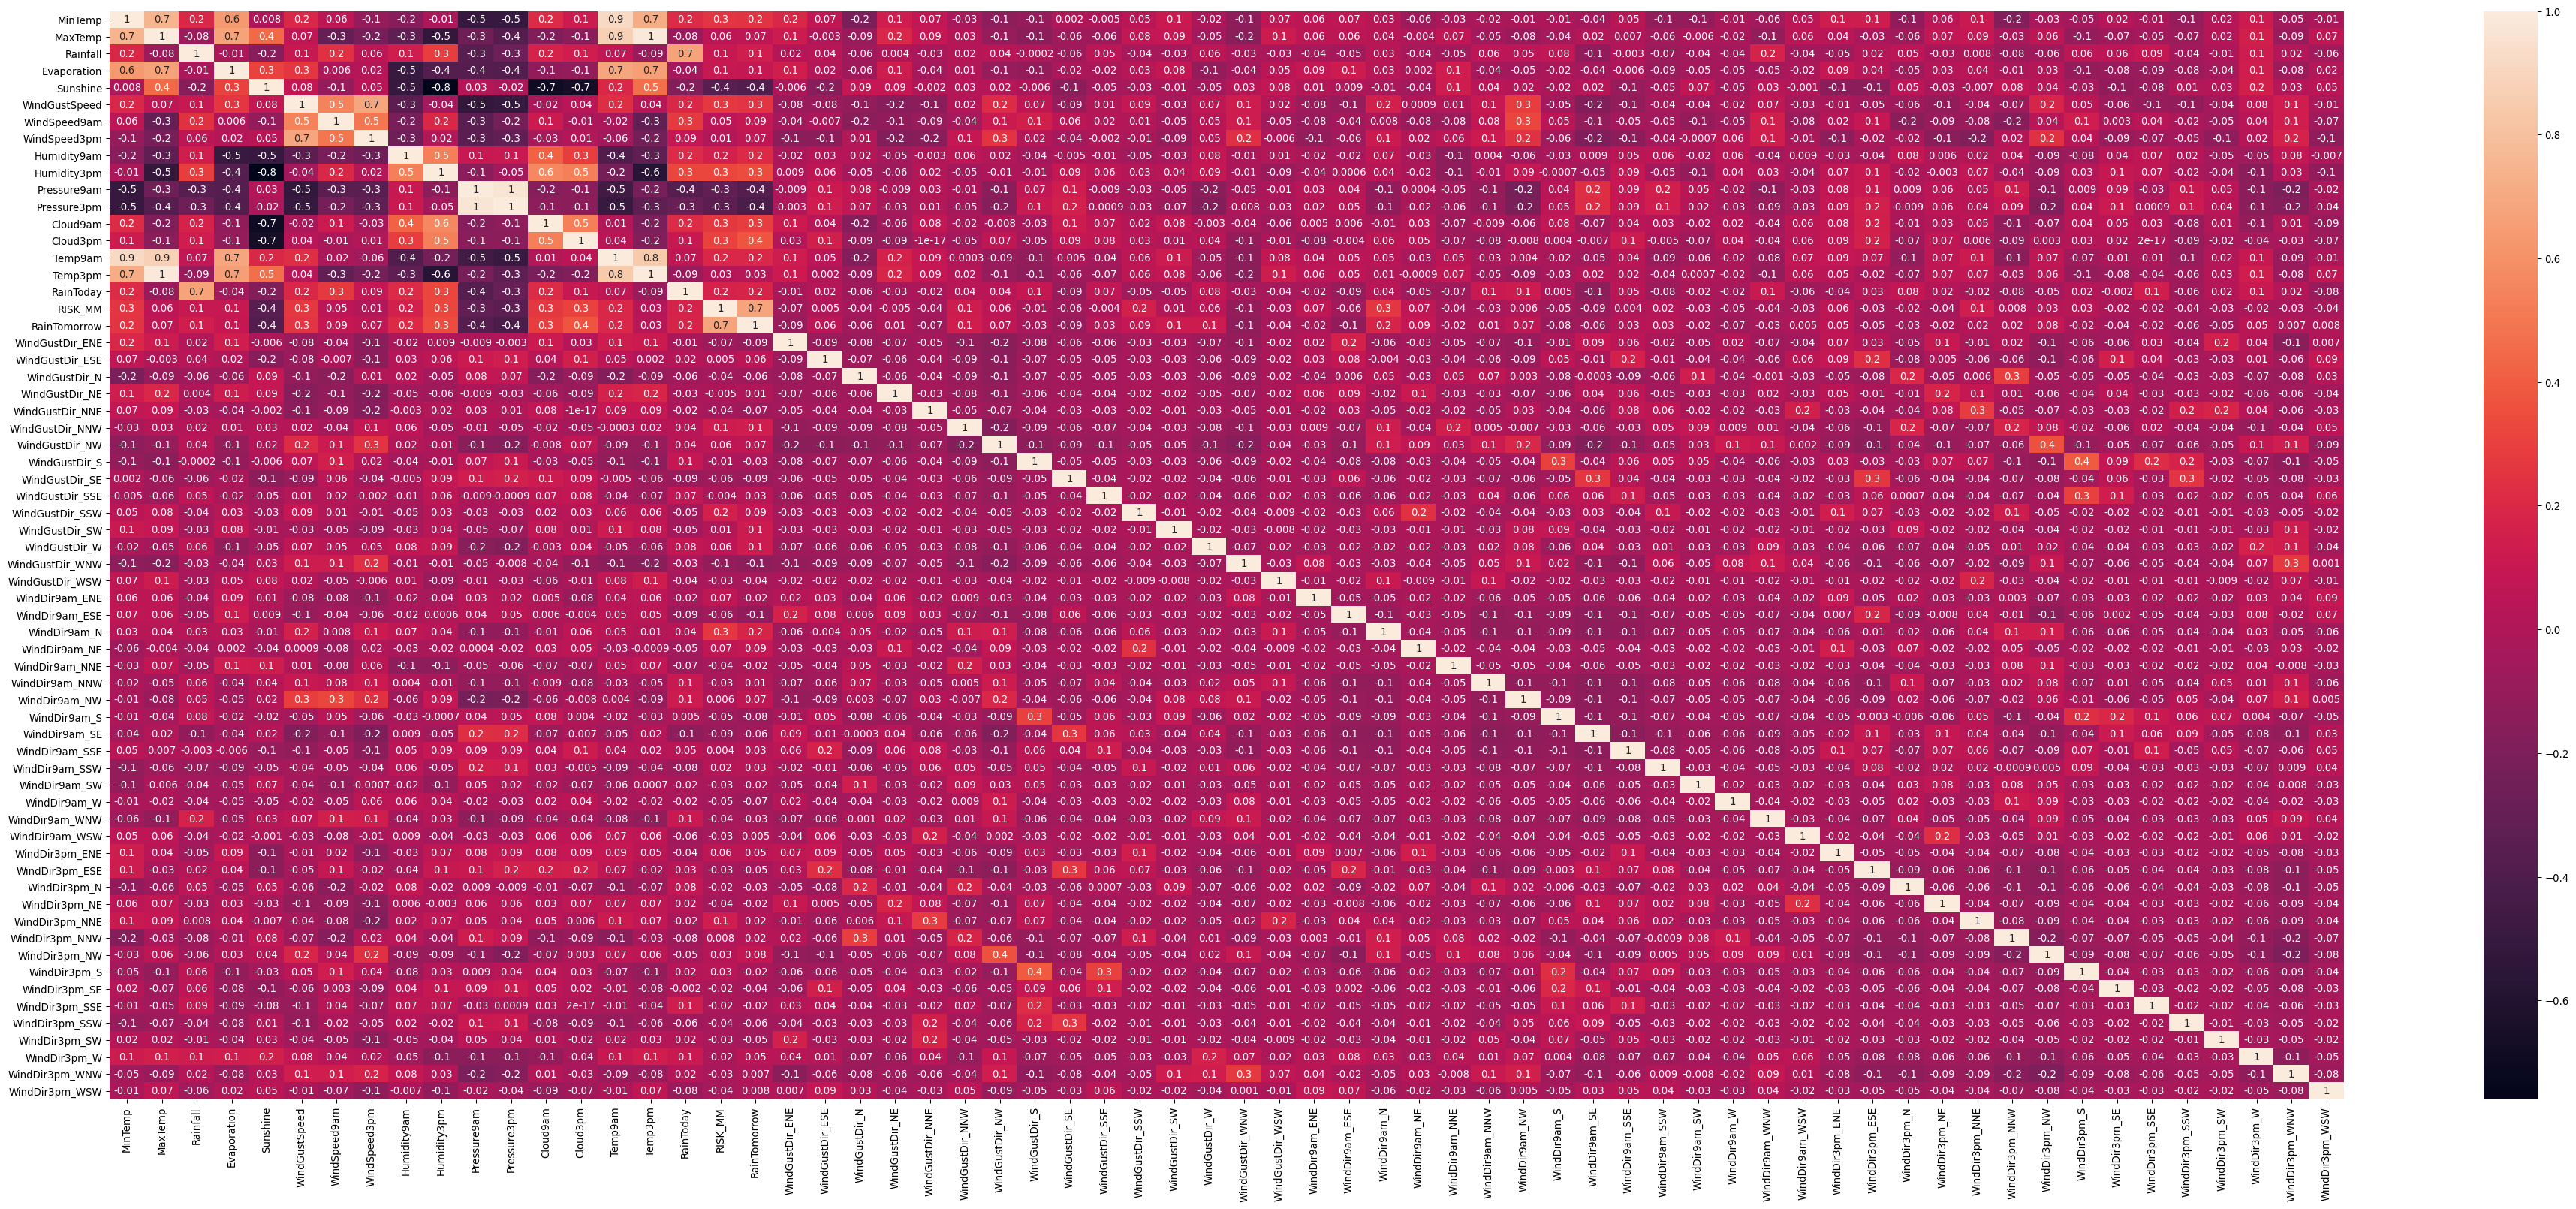

In [19]:
# Calculate correlation coefficient for all columns of the DataFrame
corr_coef = df.corr()
# Use heatmap to observe correlations.
plt.figure(figsize = (50, 20), dpi = 96)
sns.heatmap(corr_coef, annot = True, fmt='.1g')
plt.show()

In [ ]:
As we can see, this heatmap is huge, yet it has most of the columns which are not so well related to the target column RainTomorrow.


In [20]:
# Import the module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Split the training and testing data
features = list(df.columns)
features.remove('RainTomorrow')

X = df[features]
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
     

In [25]:
X_test

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
254,-2.6,11.1,0.2,1.4,6.5,20.0,2.0,7,87,54,...,1,0,0,0,0,0,0,0,0,0
110,11.4,27.1,0.0,5.6,12.1,33.0,6.0,15,69,38,...,0,0,0,1,0,0,0,0,0,0
281,3.1,12.5,1.2,1.4,7.2,43.0,6.0,30,69,62,...,0,0,0,0,0,0,0,0,0,0
9,8.4,22.8,16.2,5.4,7.7,31.0,7.0,6,82,32,...,0,0,0,0,0,0,0,0,0,0
93,14.9,28.8,0.0,5.8,8.1,30.0,7.0,11,71,44,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,-2.7,15.2,0.0,4.0,9.7,30.0,6.0,20,62,35,...,0,0,0,0,0,0,0,0,1,0
284,-0.3,9.3,0.4,1.4,9.9,39.0,9.0,30,72,60,...,0,0,0,0,0,0,0,0,0,0
56,14.3,26.7,0.0,7.2,7.1,65.0,7.0,48,68,64,...,1,0,0,0,0,0,0,0,0,0
242,0.5,15.4,0.0,2.4,6.4,70.0,22.0,28,53,68,...,1,0,0,0,0,0,0,0,0,0


In [26]:
# Normalise the train and test data-frames using the standard normalisation method.
# Define the 'standard_scalar()' function for calculating Z-scores
def standard_scaler(series):
  if (series.std() != 0):
    new_series = (series - series.mean()) / series.std()
    return new_series
  return series
# Create the DataFrames norm_X_train and norm_X_train
norm_X_train = X_train.apply(standard_scaler, axis = 0)
norm_X_test = X_test.apply(standard_scaler, axis = 0)
# Apply the 'standard_scalar()' on X_train on numeric columns using apply() function and get the descriptive statistics of the normalised X_train
print(norm_X_train.describe())
# Apply the 'standard_scalar()' on X_test on numeric columns using apply() function and get the descriptive statistics of the normalised X_test
print(norm_X_test.describe())
     

            MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  2.290000e+02  2.290000e+02  2.290000e+02  2.290000e+02  2.290000e+02   
mean   1.306573e-16  9.284179e-16  3.878508e-17  2.281048e-16  1.789932e-15   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.905557e+00 -1.936475e+00 -3.504873e-01 -1.510115e+00 -2.282556e+00   
25%   -8.660159e-01 -8.769208e-01 -3.504873e-01 -8.406493e-01 -5.834036e-01   
50%   -1.090940e-02 -1.264036e-01 -3.504873e-01 -1.711832e-01  1.941744e-01   
75%    8.441971e-01  6.976938e-01 -2.895908e-01  7.214383e-01  7.701581e-01   
max    2.219074e+00  2.213444e+00  5.678266e+00  3.399303e+00  1.634134e+00   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   2.290000e+02  2.290000e+02  2.290000e+02  2.290000e+02  2.290000e+02   
mean    1.910165e-16 -2.060458e-17 -7.708535e-17 -2.191357e-16  2.031369e-16   
std     1.000000e+00  1.000000e+00  1.000000e+00

In [27]:

# Deploy the 'LogisticRegression' model using the 'fit()' function.
lg_clf = LogisticRegression()
lg_clf.fit(norm_X_train, y_train)
lg_clf.score(norm_X_train, y_train)

0.9912663755458515

In [28]:
# Make predictions on the train dataset by using the 'predict()' function.
lg_clf_train_pred = lg_clf.predict(norm_X_train)
lg_clf_train_pred
     

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [29]:
# Display the results of confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_train, lg_clf_train_pred)

array([[187,   0],
       [  2,  40]], dtype=int64)

In [30]:
# Here, we can see above that the model has predicted with almost 100% accuracy, hence our model is working well.
# As we saw above, the model has very less false-positives and false-negatives.
# Displaying the results of classification report for train dataset prediction
print(classification_report(y_train, lg_clf_train_pred))
     

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       187
           1       1.00      0.95      0.98        42

    accuracy                           0.99       229
   macro avg       0.99      0.98      0.99       229
weighted avg       0.99      0.99      0.99       229



In [31]:
# Make predictions on the test dataset by using the 'predict()' function.
lg_clf_test_pred = lg_clf.predict(norm_X_test)
lg_clf_test_pred
     

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [32]:
# Confusion matrix for predictions on test dataset
confusion_matrix(y_test, lg_clf_test_pred)

array([[81,  0],
       [ 5, 13]], dtype=int64)

In [33]:
# Classification report on test dataset prediction
print(classification_report(y_test, lg_clf_test_pred))
     

    

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        81
           1       1.00      0.72      0.84        18

    accuracy                           0.95        99
   macro avg       0.97      0.86      0.90        99
weighted avg       0.95      0.95      0.95        99

